#Logistic Regression,Evalution and Cross Validation

####1)What is Logistic Regression, and how does it differ from Linear Regression.

Ans: Logistric Regression is a statistical method to predict claffication problem.Instead of predicting a continuous output using Linear Regression, it predicts the probability that a given input belongs to a particular class.


####2)What is the mathematical equation of Logistic Regression.

Ans: y_pred= 1 / (1+ e power -(m1x1+m2X2+....+C))

####3)Why do we use the Sigmoid function in Logistic Regression.
Ans: To find the best fit line sigmoid function converts the continuous variable data into the probability i.e. between 0 and 1.

####4)What is the cost function of Logistic Regression.

Ans: Cos_func(y_pred,yi)= sigma (-yi log y_pred + (1−yi)log(1−y_pred))

####5)What is Regularization in Logistic Regression? Why is it needed.
Regularization is nothing adding something to the cost function in order to prevent overfitting and also to avoid multicollinearity.

####6)Explain the difference between Lasso, Ridge, and Elastic Net regression

Ans: Lasso also called as L1 regularization, Lasso is very useful in feature selection , so that it reduces multicollinearity.

Ridge or L2 regularization is helps to prevent overfitting the model

L1+L2 = Elasticnet . Combing both l1 nd l2 we can avoid overfitting and multicollinearity so that the model can have the better accuracy results.

####7)When should we use Elastic Net instead of Lasso or Ridge.

Ans: ElasticNet is preffered over Lasso and Ridge when we dealing with large dataset with high dimensionality and with highly correlated features.


####8)What is the impact of the regularization parameter (λ) in Logistic Regression.

Ans: Regularization parameter Lambda is very useful in maintaining balance between bias and variance by penalizing the magnitude of model coefficients.
We need low variance and low bias model so that we build more generic and accurate model.

####9)What are the key assumptions of Logistic Regression.
Ans: Output variable must be a binary classfier (either 0 or 1)
Should have independent features, less/no multi-collinearity
Shoould not be sensitive to the outliers


####10)What are some alternatives to Logistic Regression for classification tasks.
Ans: Decision Trees, SVC(SVM), Naive-Bayees

####11)What are Classification Evaluation Metrics.
Ans: Accuracy Score, Precision, Recall, F1, FPR, TPR , ROC-AUC

####12)How does class imbalance affect Logistic Regression.
Ans:When we're working with class imbalance Dataset , we might get accuracy score close to 1 which means as per metrics model is very very good but in-reality it performs very poor on predicting classes.

####13)What is Hyperparameter Tuning in Logistic Regression.
Ans: Hyperparameter is a parameter which controls the learning rate, hyperparameter tuning is very very important in generalizing the model, to avoid overfitting and to finding the optimal C/solver/penalty

####14)What are different solvers in Logistic Regression? Which one should be used.
Ans: Solve is used to minimize the cost function.
'Liblinear' is suitable for small datasets; supports both L1 and L2 penalties.
'lbfgs' Optimized for large datasets; supports L2 penalty.
'Saga' Handles very large datasets and supports L1, L2, and Elastic Net penalties.

‘newton-cg’ : L2
newton-cholesky’  ‘l2’,
‘sag’ ‘l2’, None


####15)How is Logistic Regression extended for multiclass classification.
Ans: By using multi_Class parameter we can extend Logistic regression for Multiclass classification. Primarily we ise OneVersusRest, Nominal and OneVersusOne for multiclass classfication problems .

####16)What are the advantages and disadvantages of Logistic Regression.
Ans: Advantages:
Easy to understand and to classfiy
Regularization helps to find optimal scores in LogisticRegression

Disadvantages:
Sentive to outliers
Overfitting problems in dealing with high dimensionality.

####17)What are some use cases of Logistic Regression.
Ans: UseCaes: Disease prediction in healthcare, Email Spam filteration, predicting churn (whether a customer will leave a subscription service or not)
,helps in credit risk analysis i.e predicting the likelihood of defaulting based on features like income, age, location and etc...

####18)What is the difference between Softmax Regression and Logistic Regression.

Ans: Logistic Regression:
Binary Classfication
Uses Sigmoid function

Softmax regression:
Multinomial or Multiclass classification
Uses Softmax function

####19)How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification.

Ans: One-vs-Rest (OvR): OvR trains a separate binary classifier for each class in the dataset.For a dataset with ( k ) classes, ( k ) binary classifiers are trained. Each classifier predicts whether a sample belongs to its specific class or not.

Softmax is an extension of Logistic Regression for multiclass classification.
It trains a single model with (k) output nodes, where each node represents the probability of a particular class. The probabilities for all classes sum to 1.

If the class has small to medium no.of(k) classes we can use OvR , else Softmax or Multinomial is used .


####20)How do we interpret coefficients in Logistic Regression?
Ans: Coefficients are very impotant in analyzing the dataset , which feature is more important(impact) so that we can apply weightage accordingly, so that we can build a generalized model.


##Practical

###1)Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, StratifiedKFold,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, mean_absolute_error,mean_squared_error,r2_score, roc_auc_score,roc_curve,precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving startup_data.csv to startup_data.csv


In [3]:
df = pd.read_csv('startup_data.csv')
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [4]:
df.drop(['Startup Name'],axis=1,inplace=True) # Names column doesnt help in model building

In [5]:
df.rename(columns={'Exit Status':'Exit_Status','Funding Amount (M USD)':'Funded_Amount($)','Valuation (M USD)':'Valuation($)','Revenue (M USD)':'Revenue($)','Market Share (%)':'Market_share(%)','Year Founded':'Founded_Year','Funding Rounds':'Funding_Rounds'},inplace=True)

In [6]:
df.Industry.value_counts()

,count
Industry,
EdTech,74
FinTech,71
E-Commerce,70
Gaming,62
AI,62
IoT,61
Cybersecurity,51
HealthTech,49


In [7]:
industry_items={'IoT':1, 'EdTech':2, 'Gaming':3, 'AI':4, 'HealthTech':5, 'FinTech':6,'Cybersecurity':7, 'E-Commerce':8}
df['Industry'] = df['Industry'].str.strip()
df['Industry']=df['Industry'].map(industry_items) # Encoded Industry Type
df.sample(3)

,Industry,Funding_Rounds,Funded_Amount($),Valuation($),Revenue($),Employees,Market_share(%),Profitable,Founded_Year,Region,Exit_Status
201,3,4,298.90,3192.86,16.97,2347,9.82,1,2009,Australia,Private
166,7,3,273.15,2369.50,66.00,4241,7.17,1,1999,Europe,Acquired
475,6,3,120.01,1623.21,75.96,524,2.39,0,2015,Australia,Private


In [8]:
categories_dict={}
for col in df.select_dtypes(include='object').columns:
    df[col], categories = pd.factorize(df[col])
    categories_dict[col]=categories #save all the categories in a dictionary , encode the all object columns at once

In [9]:
print(categories_dict)

{'Region': Index(['Europe', 'South America', 'Australia', 'North America', 'Asia'], dtype='object'), 'Exit_Status': Index(['Private', 'Acquired', 'IPO'], dtype='object')}


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=['Founded_Year','Market_share(%)','Funded_Amount($)','Valuation($)','Revenue($)','Funding_Rounds']
df[num_cols]=scaler.fit_transform(df[num_cols])
df.head()

,Industry,Funding_Rounds,Funded_Amount($),Valuation($),Revenue($),Employees,Market_share(%),Profitable,Founded_Year,Region,Exit_Status
0,1,-1.360170,-0.595480,-0.539330,0.634382,1468,0.038170,0,-0.004712,0,0
1,2,-1.360170,1.096611,1.984165,0.900471,3280,1.072098,1,-0.325988,1,0
2,2,-1.360170,-0.501366,-0.319713,1.193237,4933,-0.885235,1,-1.182723,1,0
3,3,1.418522,-1.638703,-1.299475,-0.076671,1059,-0.913757,0,-0.325988,1,0
4,1,0.723849,1.115781,-0.533845,0.031748,1905,-0.357575,0,-0.968539,0,1


In [11]:
#split x and y
X=df.drop('Profitable',axis=1)
y=df['Profitable']

In [12]:
#Training the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Model Training
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred=lgr.predict(x_test)
#Model Evalution
print("Accuracy score of Startup_data using Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Startup_data: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Startup_data using Logistic Regression is: \n",classification_report(y_test,y_pred))

Accuracy score of Startup_data using Logistic Regression is :
 0.51
Confusion Matrix of Startup_data: is 
 [[39 21]
 [28 12]]
Clasification Report of Startup_data using Logistic Regression is: 
               precision    recall  f1-score   support

           0       0.58      0.65      0.61        60
           1       0.36      0.30      0.33        40

    accuracy                           0.51       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.49      0.51      0.50       100



###2)Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

In [15]:
model = LogisticRegression(penalty='l1', C=0.5, solver='liblinear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#Model Evalution
print("Accuracy score of Startup_data using Lasso(L1) Regularization is :\n",accuracy_score(y_test,y_pred))
print(f"Coefficients of Startup_data is Lasso(L1) Regularization is {model.coef_}\n")
print("Intercept(C) of Startup_data using Lasso(L1) is: \n",model.intercept_)

Accuracy score of Startup_data using Lasso(L1) Regularization is :
 0.54
Coefficients of Startup_data is Lasso(L1) Regularization is [[-4.40727376e-02  5.05788724e-02 -3.73715235e-01  4.30108281e-01
   7.19391186e-02 -5.47881534e-05  2.04503789e-01  1.98064523e-02
   6.49381662e-02  1.18518517e-01]]

Intercept(C) of Startup_data using Lasso(L1) is: 
 [-0.07680995]


###3) Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients?

In [16]:
model = LogisticRegression(penalty='l2', C=0.5, solver='lbfgs')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#Model Evalution
print("Accuracy score of Startup_data using Ridge(L2) Regularization is :\n",accuracy_score(y_test,y_pred))
print(f"Coefficients of Startup_data is Ridge(L2) Regularization is {model.coef_}\n")
print("Intercept(C) of Startup_data using Ridge(L2) is: \n",model.intercept_)

Accuracy score of Startup_data using Ridge(L2) Regularization is :
 0.53
Coefficients of Startup_data is Ridge(L2) Regularization is [[-4.69070782e-02  7.31239568e-02 -4.32708766e-01  4.89523315e-01
   9.97715978e-02 -4.68735072e-05  2.12553418e-01  3.99291266e-02
   8.22423643e-02  2.03799847e-01]]

Intercept(C) of Startup_data using Ridge(L2) is: 
 [-0.15925529]


###4)Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

In [17]:
model = LogisticRegression(penalty='elasticnet', C=0.5, solver='saga',l1_ratio=0.5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#Model Evalution
print("Accuracy score of Startup_data using ElasticNet(L1+L2) Regularization is :\n",accuracy_score(y_test,y_pred))
print(f"Coefficients of Startup_data is ElasticNet(L1+L2) Regularization is {model.coef_}\n")
print("Intercept(C) of Startup_data using ElasticNet(L1+L2) is: \n",model.intercept_)

Accuracy score of Startup_data using ElasticNet(L1+L2) Regularization is :
 0.6
Coefficients of Startup_data is ElasticNet(L1+L2) Regularization is [[-2.29529646e-04  3.06623857e-05 -2.56081299e-05  1.33547291e-04
   5.05143500e-05 -7.78585401e-05  1.94540976e-04  3.30218203e-05
   6.28759508e-05  3.26730037e-05]]

Intercept(C) of Startup_data using ElasticNet(L1+L2) is: 
 [-3.7817164e-05]


###5)Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y
df.head()
df.target.value_counts()
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [19]:
#Split the data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
#Model Building
lgr=LogisticRegression(multi_class='ovr',solver='lbfgs')
lgr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [21]:
#Model predictiction and evalutation
y_pred=lgr.predict(x_test)
print("Accuracy score of Iris dataset using Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Iris dataset: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Iris dataset using Logistic Regression is: \n",classification_report(y_test,y_pred))

Accuracy score of Iris dataset using Logistic Regression is :
 0.8666666666666667
Confusion Matrix of Iris dataset: is 
 [[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
Clasification Report of Iris dataset using Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30



 ###6)Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy

In [22]:
model_grid= GridSearchCV(estimator=lgr,param_grid={'C':[0.1,1,10],'penalty':['l1','l2','elasticnet']},verbose=2)
model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..........................C=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ..........................C=0.1, penalty

GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [23]:
model_grid.best_params_ #Observation: We can see model is performing well on C=10 and in L2 regularization
model_grid.best_score_


np.float64(0.9416666666666668)

In [24]:
y_pred=model_grid.predict(x_test)
print("Accuracy score of Iris dataset using GridsearchCV in Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Iris dataset Using GridsearchCV in Logistic Regression: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Iris dataset using GridsearchCV in Logistic Regression is: \n",classification_report(y_test,y_pred))

Accuracy score of Iris dataset using GridsearchCV in Logistic Regression is :
 0.9333333333333333
Confusion Matrix of Iris dataset Using GridsearchCV in Logistic Regression: is 
 [[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
Clasification Report of Iris dataset using GridsearchCV in Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



###7)Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

In [25]:
iris = load_iris()
X, y = iris.data, iris.target
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accuracy_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lgr.fit(X_train, y_train)
    y_pred = lgr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy scores for each fold:", accuracy_scores)
print("Average accuracy:", np.mean(accuracy_scores))


Accuracy scores for each fold: [0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 1.0, 0.8, 0.9333333333333333]
Average accuracy: 0.9400000000000001


###8)Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [36]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('bmi.csv')
df=pd.DataFrame(df)
df.shape

Saving bmi.csv to bmi (1).csv


(500, 4)

In [37]:
#Bmi_index={'Extremely Weak':0,'Weak':1,'Normal':2,'Overweight':3,'Obesity':4,'Extreme Obesity':5}
df.rename(columns={'Index':'Bmi_index'},inplace=True)
df
df['Gender']=df.Gender.map({'Male':0,'Female':1})
df['Gender']=df.Gender.astype(int)
df.head()
df.sample(3)
X= df.iloc[:,:-1]
y=df['Bmi_index']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape,y_train.shape)
scaler=StandardScaler()  #Scaling the data
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of BMI dataset using Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of BMI dataset: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of BMI dataset using Logistic Regression is: \n",classification_report(y_test,y_pred))


(400, 3) (400,)
Accuracy score of BMI dataset using Logistic Regression is :
 0.81
Confusion Matrix of BMI dataset: is 
 [[ 0  3  1  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  1 13  1  0  0]
 [ 0  0  1  5  7  0]
 [ 0  0  0  0 21  1]
 [ 0  0  0  0  3 41]]
Clasification Report of BMI dataset using Logistic Regression is: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.20      0.50      0.29         2
           2       0.81      0.87      0.84        15
           3       0.83      0.38      0.53        13
           4       0.68      0.95      0.79        22
           5       0.98      0.93      0.95        44

    accuracy                           0.81       100
   macro avg       0.58      0.61      0.57       100
weighted avg       0.81      0.81      0.79       100



###9) Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

In [38]:
model_random= RandomizedSearchCV(estimator=lgr,param_distributions={'C':[0.1,1,10,40,100],'penalty':['l1','l2','elasticnet'],'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']},n_iter=10,verbose=2)
model_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .....................C=40, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=40, penalty=l1, 

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1, 10, 40, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=2)

In [39]:
print(f"Model best params using RandomSearchCV in LogisticRegression are {model_random.best_params_}") #Observation: We can see model is performing well on {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
y_pred=model_random.predict(x_test)
print("Accuracy score of BMI dataset using RandomizedSearchCV in Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of BMI dataset Using RandomizedSearchCV in Logistic Regression: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of BMI dataset using RandomizedSearchCV in Logistic Regression is: \n",classification_report(y_test,y_pred))

Model best params using RandomSearchCV in LogisticRegression are {'solver': 'saga', 'penalty': 'l1', 'C': 100}
Accuracy score of BMI dataset using RandomizedSearchCV in Logistic Regression is :
 0.92
Confusion Matrix of BMI dataset Using RandomizedSearchCV in Logistic Regression: is 
 [[ 3  1  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  1 14  0  0  0]
 [ 0  0  1 12  0  0]
 [ 0  0  0  0 21  1]
 [ 0  0  0  0  3 41]]
Clasification Report of BMI dataset using RandomizedSearchCV in Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.33      0.50      0.40         2
           2       0.88      0.93      0.90        15
           3       1.00      0.92      0.96        13
           4       0.88      0.95      0.91        22
           5       0.98      0.93      0.95        44

    accuracy                           0.92       100
   macro avg       0.84      0.83      0.83       100
weighted 

###10)Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

In [40]:
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsOneClassifier(LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score of BMI dataset using One VS One multiclass in Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of BMI dataset Using One VS One multiclass in Logistic Regression: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of BMI dataset using One VS One multiclass in Logistic Regression is: \n",classification_report(y_test,y_pred))

Accuracy score of BMI dataset using One VS One multiclass in Logistic Regression is :
 0.91
Confusion Matrix of BMI dataset Using One VS One multiclass in Logistic Regression: is 
 [[ 1  3  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 12  1  0]
 [ 0  0  0  0 21  1]
 [ 0  0  0  0  3 41]]
Clasification Report of BMI dataset using One VS One multiclass in Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.25      0.50      0.33         2
           2       0.94      1.00      0.97        15
           3       1.00      0.92      0.96        13
           4       0.84      0.95      0.89        22
           5       0.98      0.93      0.95        44

    accuracy                           0.91       100
   macro avg       0.83      0.76      0.75       100
weighted avg       0.93      0.91      0.91       100



###11)Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


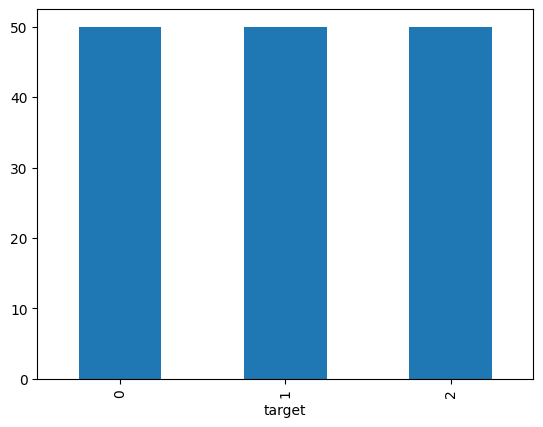

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y
df.target.value_counts().plot.bar()
df=df[np.where(df['target']!=2,True,False)] # deleted class_2 , inorder perform binary classfication
#df.reset_index(drop=True, inplace=True)
df.head()

In [42]:
df.target.value_counts()

,count
target,
0,50
1,50


Accuracy score of Iris dataset using Logistic Regression is :
 1.0
Confusion Matrix of Iris dataset: is 
 [[ 8  0]
 [ 0 12]]
Clasification Report of Iris dataset using Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



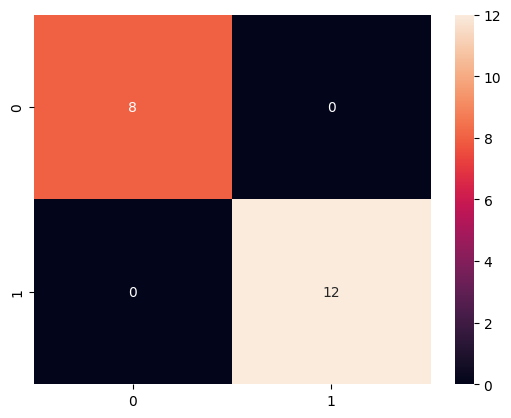

In [43]:
X=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of Iris dataset using Logistic Regression is :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Iris dataset: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Iris dataset using Logistic Regression is: \n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

###12)Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,Recall, and F1-Score

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [45]:
y_pred_prob=lgr.predict_proba(x_test)
y_pred_prob

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

###13)Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

In [46]:
from google.colab import files
uploaded = files.upload()

Saving glass (Imbalanced).xlsx to glass (Imbalanced).xlsx


In [47]:
df=pd.read_excel('glass (Imbalanced).xlsx')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0,0.1224,negative
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0,0.0000,negative
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0,0.0000,negative
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0,0.0000,negative
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0,0.0561,negative


<Axes: ylabel='count'>

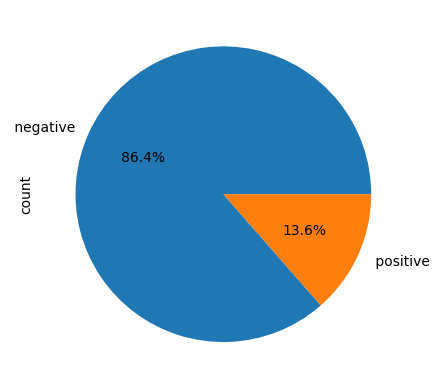

In [48]:
df.Class.value_counts().plot.pie(autopct='%1.1f%%')

In [49]:
X=df.drop('Class',axis=1)
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lgr=LogisticRegression(class_weight='balanced',random_state=42) #applied class weight to handle imbalanced dataset
lgr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [50]:
y_pred=lgr.predict(x_test)
print("Accuracy score of Glass dataset using Logistic Regression with Class_Weight :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Glass dataset with Class_Weightin Linear Regression model: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Glass dataset using Logistic Regression with Class_Weight: \n",classification_report(y_test,y_pred))

Accuracy score of Glass dataset using Logistic Regression with Class_Weight :
 0.9302325581395349
Confusion Matrix of Glass dataset with Class_Weightin Linear Regression model: is 
 [[36  3]
 [ 0  4]]
Clasification Report of Glass dataset using Logistic Regression with Class_Weight: 
               precision    recall  f1-score   support

    negative       1.00      0.92      0.96        39
    positive       0.57      1.00      0.73         4

    accuracy                           0.93        43
   macro avg       0.79      0.96      0.84        43
weighted avg       0.96      0.93      0.94        43



In [51]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
lgr=LogisticRegression()
lgr.fit(x_train_smote,y_train_smote)
y_pred=lgr.predict(x_test)
print("Accuracy score of Glass dataset using Logistic Regression with SMOTE sampling :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Glass dataset with SMOTE sampling \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Glass dataset using Logistic Regression with SMOTE sampling: \n",classification_report(y_test,y_pred))

Accuracy score of Glass dataset using Logistic Regression with SMOTE sampling :
 0.9302325581395349
Confusion Matrix of Glass dataset with SMOTE sampling 
 [[36  3]
 [ 0  4]]
Clasification Report of Glass dataset using Logistic Regression with SMOTE sampling: 
               precision    recall  f1-score   support

    negative       1.00      0.92      0.96        39
    positive       0.57      1.00      0.73         4

    accuracy                           0.93        43
   macro avg       0.79      0.96      0.84        43
weighted avg       0.96      0.93      0.94        43



<Axes: ylabel='count'>

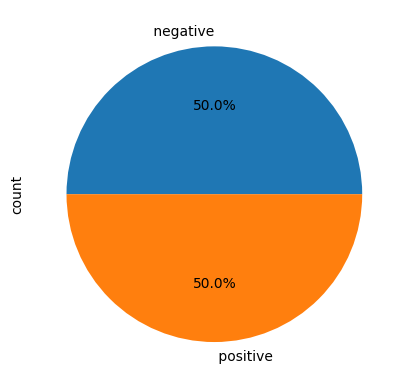

In [52]:
df1=pd.DataFrame(y_train_smote,columns=['Class'])
y_train_smote.value_counts().plot.pie(autopct='%1.1f%%')


###14)Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [54]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [56]:
df.Cabin.mode()
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True) #replacing NaN with mean


In [57]:
df['Embarked']=df.Embarked.map({'S':1,'C':2,'Q':3})
df['Sex']=df.Sex.map({'male':1,'female':2}) # Encode the categorical columns

In [58]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
df.head() #removed noisy columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,3
1,1,3,2,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,3
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,2,22.0,1,1,12.2875,1


In [59]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [60]:
X=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of Titanic dataset using Logistic Regression :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Titanic dataset using Logistic Regression: is \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Titanic dataset using Logistic Regression: \n",classification_report(y_test,y_pred))

Accuracy score of Titanic dataset using Logistic Regression :
 1.0
Confusion Matrix of Titanic dataset using Logistic Regression: is 
 [[58  0]
 [ 0 26]]
Clasification Report of Titanic dataset using Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



###15)M Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

In [61]:
from google.colab import files
uploaded = files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [62]:
df=pd.read_csv('Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [63]:
df.isna().sum()
df.dtypes
df.drop('CustomerID',axis=1,inplace=True)
df.Class.value_counts()

,count
Class,
0,383
1,307


In [64]:
X=df.drop('Class',axis=1)
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of Credit_Card_Applications dataset using Logistic Regression without Scaling :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Credit_Card_Applications dataset using Logistic Regression: without Scaling \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Credit_Card_Applications dataset using Logistic Regression without scaling \n",classification_report(y_test,y_pred))


Accuracy score of Credit_Card_Applications dataset using Logistic Regression without Scaling :
 0.8260869565217391
Confusion Matrix of Credit_Card_Applications dataset using Logistic Regression: without Scaling 
 [[67  7]
 [17 47]]
Clasification Report of Credit_Card_Applications dataset using Logistic Regression without scaling 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        74
           1       0.87      0.73      0.80        64

    accuracy                           0.83       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.83      0.83      0.82       138



In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of Credit_Card_Applications dataset using Logistic Regression with Scaling :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Credit_Card_Applications dataset using Logistic Regression: with Scaling \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Credit_Card_Applications dataset using Logistic Regression with scaling \n",classification_report(y_test,y_pred))


Accuracy score of Credit_Card_Applications dataset using Logistic Regression with Scaling :
 0.927536231884058
Confusion Matrix of Credit_Card_Applications dataset using Logistic Regression: with Scaling 
 [[69  5]
 [ 5 59]]
Clasification Report of Credit_Card_Applications dataset using Logistic Regression with scaling 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        74
           1       0.92      0.92      0.92        64

    accuracy                           0.93       138
   macro avg       0.93      0.93      0.93       138
weighted avg       0.93      0.93      0.93       138



###16)Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

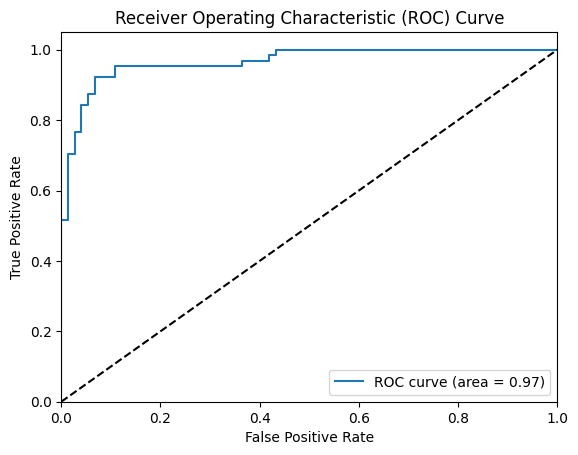

In [66]:
from sklearn.metrics import roc_curve,auc
y_pred_prob=lgr.predict_proba(x_test)
y_pred_prob=y_pred_prob[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc_score(y_test,y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


###17)Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

In [67]:
lgr=LogisticRegression(C=0.5)
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of Credit_Card_Applications dataset using Logistic Regression with custom learning rate :\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix of Credit_Card_Applications dataset using Logistic Regression: with custom learning rate \n",confusion_matrix(y_test,y_pred))
print("Clasification Report of Credit_Card_Applications dataset using Logistic Regression with custom learning rate \n",classification_report(y_test,y_pred))

Accuracy score of Credit_Card_Applications dataset using Logistic Regression with custom learning rate :
 0.927536231884058
Confusion Matrix of Credit_Card_Applications dataset using Logistic Regression: with custom learning rate 
 [[69  5]
 [ 5 59]]
Clasification Report of Credit_Card_Applications dataset using Logistic Regression with custom learning rate 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        74
           1       0.92      0.92      0.92        64

    accuracy                           0.93       138
   macro avg       0.93      0.93      0.93       138
weighted avg       0.93      0.93      0.93       138



###18)Write a Python program to train Logistic Regression and identify important features based on model coefficients.

In [68]:
lgr=LogisticRegression(penalty='l1',solver='saga')
lgr.fit(x_train,y_train)
lgr.score(x_train,y_train)
y_pred=lgr.predict(x_test)
for i, col in enumerate(X.columns):
    print(f"{col}: {lgr.coef_[0][i]}")

#Observation : A8,A14, A5 are important features

A1: 0.017683911133278832
A2: 0.058868219508572614
A3: -0.05634824875891875
A4: 0.19879319943639084
A5: 0.6638054654050756
A6: 0.029105963882083214
A7: 0.18156788756027203
A8: 1.4809893263238367
A9: 0.2550015754157273
A10: 0.6024433230782474
A11: -0.10011041309042312
A12: 0.0014466758842862873
A13: -0.3139569904962469
A14: 1.3142892451138812


###19) Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

In [69]:
from sklearn.metrics import cohen_kappa_score
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
cohen_kappa_score(y_test,y_pred)


np.float64(0.8543074324324325)

###20)Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio


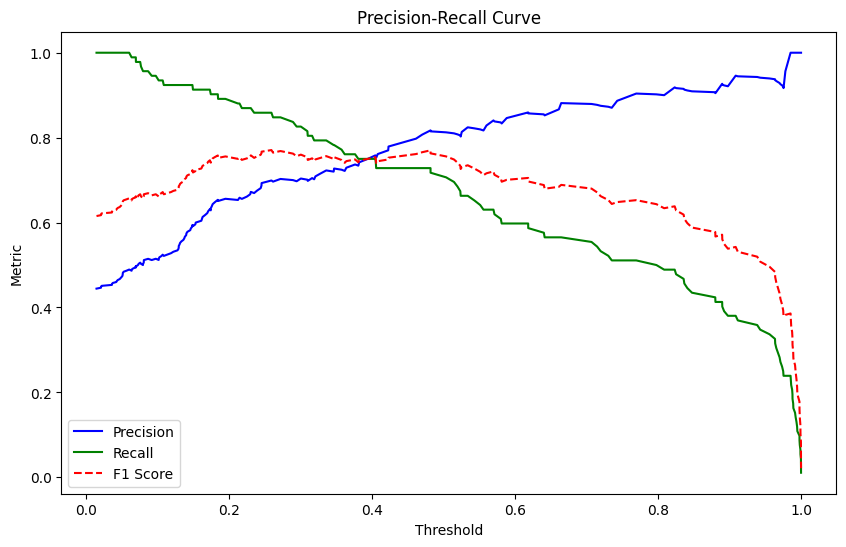

In [78]:
from sklearn.metrics import precision_recall_curve
X=df.drop('Class',axis=1)
y=df['Class']
df.head()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
lgr.score(x_train,y_train)
y_pred=lgr.predict(x_test)
y_pred_prob=lgr.predict_proba(x_test)
y_pred_prob=y_pred_prob[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,y_pred_prob)
precision,recall,threshold=precision_recall_curve(y_test,y_pred_prob)
f1_scores=f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = threshold[np.argmax(precision * recall)]
plt.figure(figsize=(10, 6))
plt.plot(threshold, precision[:-1], label="Precision", color='blue')
plt.plot(threshold, recall[:-1], label="Recall", color='green')
plt.plot(threshold, f1_scores[:-1], label="F1 Score", color='red', linestyle='--')
plt.xlabel("Threshold")
plt.ylabel("Precision-recall&F1_Scores")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#Observation: at Threshold = 0.4 out model has optimal best fit line.

###21)Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

In [79]:
# Load dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to compare
solvers = ['liblinear', 'lbfgs', 'saga']
accuracy_scores = {}

# Train Logistic Regression with different solvers
for solver in solvers:
    print(f"Training with solver: {solver}")
    model = LogisticRegression(solver=solver, max_iter=500, random_state=42)

    # Perform cross-validation for consistent results
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    accuracy_scores[solver] = mean_accuracy
    print(f"Mean Cross-Validation Accuracy with {solver}: {mean_accuracy:.4f}")
# Find the best solver
best_solver = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nBest solver: {best_solver} with accuracy: {accuracy_scores[best_solver]:.4f}")


Training with solver: liblinear
Mean Cross-Validation Accuracy with liblinear: 0.9500
Training with solver: lbfgs
Mean Cross-Validation Accuracy with lbfgs: 0.9667
Training with solver: saga
Mean Cross-Validation Accuracy with saga: 0.9750

Best solver: saga with accuracy: 0.9750


###22)Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

In [80]:
from sklearn.metrics import matthews_corrcoef
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
y_pred=lgr.predict(X_test)
matthews_corrcoef(y_test,y_pred)

np.float64(1.0)

###23)Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

In [92]:
from google.colab import files
uploaded = files.upload()

Saving bmi.csv to bmi (3).csv


In [93]:
df=pd.DataFrame(pd.read_csv('bmi.csv'))
df.isna().sum()
df['Gender']=df.Gender.map({'Male':0,'Female':1})
df['Gender']=df.Gender.astype(int)
df.head()
x=df.drop('Index',axis=1)
y=df['Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [94]:
#Model building with Raw Data
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of BMI dataset using Logistic Regression without Scaling :\n",accuracy_score(y_test,y_pred))


Accuracy score of BMI dataset using Logistic Regression without Scaling :
 0.78


In [95]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
print("Accuracy score of BMI dataset using Logistic Regression with Scaling :\n",accuracy_score(y_test,y_pred))

print("Observation: Feature scaling helps to predict values better when comparing with the raw data")

Accuracy score of BMI dataset using Logistic Regression with Scaling :
 0.81
Observation: Feature scaling helps to predict values better when comparing with the raw data


###24)Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
c_values=[0.001,0.01,0.1,1,10,100,1000]

for c in c_values:
    print(f"Training with C={c}")
    lgr = LogisticRegression(C=c, max_iter=100)
    cv_scores = cross_val_score(lgr, x_train, y_train, cv=5, scoring='accuracy')  # Use scoring='accuracy' explicitly
    accuracy_scores.append(np.mean(cv_scores))
    print(f"Mean Accuracy for C={c}: {np.mean(cv_scores):.4f}")

# Find and print the optimal C value
optimal_c =c_values[np.argmax(accuracy_scores)]
print(f"\nOptimal C value: {optimal_c}")


Training with C=0.001
Mean Accuracy for C=0.001: 0.3850
Training with C=0.01
Mean Accuracy for C=0.01: 0.4725
Training with C=0.1
Mean Accuracy for C=0.1: 0.6625
Training with C=1
Mean Accuracy for C=1: 0.8200
Training with C=10
Mean Accuracy for C=10: 0.8975
Training with C=100
Mean Accuracy for C=100: 0.9200
Training with C=1000
Mean Accuracy for C=1000: 0.9225

Optimal C value: 1000


###25)Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

In [100]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
import joblib
joblib.dump(lgr, 'logistic_regression_BMI.joblib')


['logistic_regression_BMI.joblib']

In [101]:
lgr_load=joblib.load('logistic_regression_BMI.joblib')
y_pred=lgr_load.predict(x_test)
print("Accuracy score of BMI dataset using Logistic Regression :\n",accuracy_score(y_test,y_pred))

Accuracy score of BMI dataset using Logistic Regression :
 0.81
